## Compares sample mean(parametric) 

Student t-test


paired student's t-test


Analysis of varience test(ANOVA)


repeated meaures ANOVA test

## t-test

it compares mean of two groups

it's a parametric statistical test

it is used to study if there is statistical difference bteween two groups

## Type of t-test

one sample t-test

paired t-test(dependent)

unpaired t-test(independent)

## unpaired t-test have two categories

## Student t-test

Equal varience

two sample t-test

## welch t-test

unequal varience

unequal variencer t-test

## Selection of t-tet

one sample t-test(for one sample)

paired t-test (for dependent samples)

Student t-test (when sample size and varience are equal)

welch t-test (when sample size and varience are different)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(font_scale=2, palette="viridis")

In [2]:
df=pd.read_csv('pulse_rate.csv')
df

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,Year
0,173,57.0,18,2,2,1,2,2,86.0,88.0,93
1,179,58.0,19,2,2,1,2,1,82.0,150.0,93
2,167,62.0,18,2,2,1,1,1,96.0,176.0,93
3,195,84.0,18,1,2,1,1,2,71.0,73.0,93
4,173,64.0,18,2,2,1,3,2,90.0,88.0,93
...,...,...,...,...,...,...,...,...,...,...,...
105,93,27.0,19,2,2,2,3,2,119.0,120.0,98
106,161,43.0,19,2,2,2,3,2,90.0,89.0,98
107,182,60.0,22,1,2,1,3,2,86.0,84.0,98
108,170,65.0,18,1,2,1,1,2,69.0,64.0,98


## one sample t-test(for one sample)

In [3]:
df.Height.describe()

count    110.000000
mean     171.581818
std       16.076869
min       68.000000
25%      165.250000
50%      172.500000
75%      180.000000
max      195.000000
Name: Height, dtype: float64

In [4]:
stats.skew(df['Height'])

-3.4596813483410345

In [5]:
stats.kurtosis(df['Height'])

18.72902540592068

D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


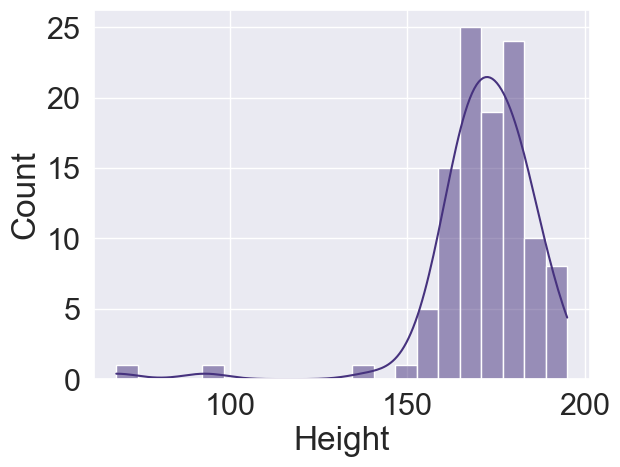

In [6]:
sns.histplot(df['Height'],kde=True)
plt.show()

stat, p = stats.ttest_1samp(df['Height'],170)
print(f"stat={stat},p-value={p}")
alpha=0.05
if p>alpha:
    print(" The aveerage height is 170  (fail to reject null hypothesis-the result is not significant)")
else:
    print(" The average height not 170 (reject null hypothesis-the result is significant)")

In [7]:
df.Age.describe()

count    110.000000
mean      20.563636
std        3.922476
min       18.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       45.000000
Name: Age, dtype: float64

In [8]:
stat, p = stats.ttest_1samp(df['Age'],20)
print(f"stat={stat},p-value={p}")
alpha=0.05
if p>alpha:
    print(" The aveerage Age is 20 (fail to reject null hypothesis-the result is not significant)")
else:
    print(" The average height not 20 (reject null hypothesis-the result is significant)")

stat=1.5070754726984867,p-value=0.1346841207960362
 The aveerage Age is 20 (fail to reject null hypothesis-the result is not significant)


## Student t-test¶

 it compares the mean of two group

equal varience

Normally distributed

Sample size should be equalSample size should be equal

In [9]:
df['Gender'].unique()

array([2, 1], dtype=int64)

In [10]:
df['Height'].describe()

count    110.000000
mean     171.581818
std       16.076869
min       68.000000
25%      165.250000
50%      172.500000
75%      180.000000
max      195.000000
Name: Height, dtype: float64

In [11]:
df.shape

(110, 11)

In [12]:
df.groupby('Gender')['Height'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,59.0,177.711864,16.273578,68.0,174.0,180.0,184.5,195.0
2,51.0,164.490196,12.673393,93.0,162.0,165.0,171.0,180.0


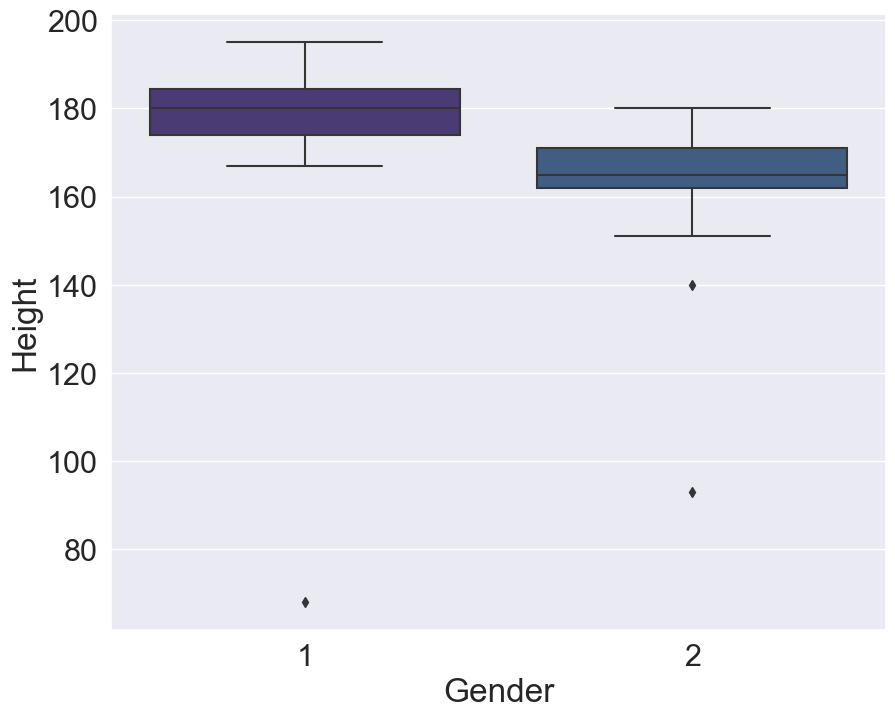

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x="Gender",y="Height")
plt.show() 

In [14]:
## subset od data
sample_1= df[(df['Gender']==1)]
sample_2= df[(df['Gender']==2)]

In [15]:
sample_1.shape,sample_2.shape

((59, 11), (51, 11))

In [16]:
## Sample size should be equal
sample_1= sample_1.sample(50)
sample_1.shape,sample_2.shape

((50, 11), (51, 11))

## varience test

In [17]:
stats.levene(sample_1['Height'],sample_2['Height'])

LeveneResult(statistic=0.0917709076125954, pvalue=0.7625734027365595)

In [18]:
stat, p = stats.levene(sample_1['Height'],sample_2['Height'])
print(f"stat={stat},p-value={p}")
alpha=0.05
if p>alpha:
    print(" The varience are equal between two groups (fail to reject null hypothesis-the result is not significant)")
else:
    print(" The varience are not equal between two groups  (reject null hypothesis-the result is significant)")

stat=0.0917709076125954,p-value=0.7625734027365595
 The varience are equal between two groups (fail to reject null hypothesis-the result is not significant)


## If the test were to be significant a viable alternative would be to conduct a Welch's t-test

D:\plant_pathology\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


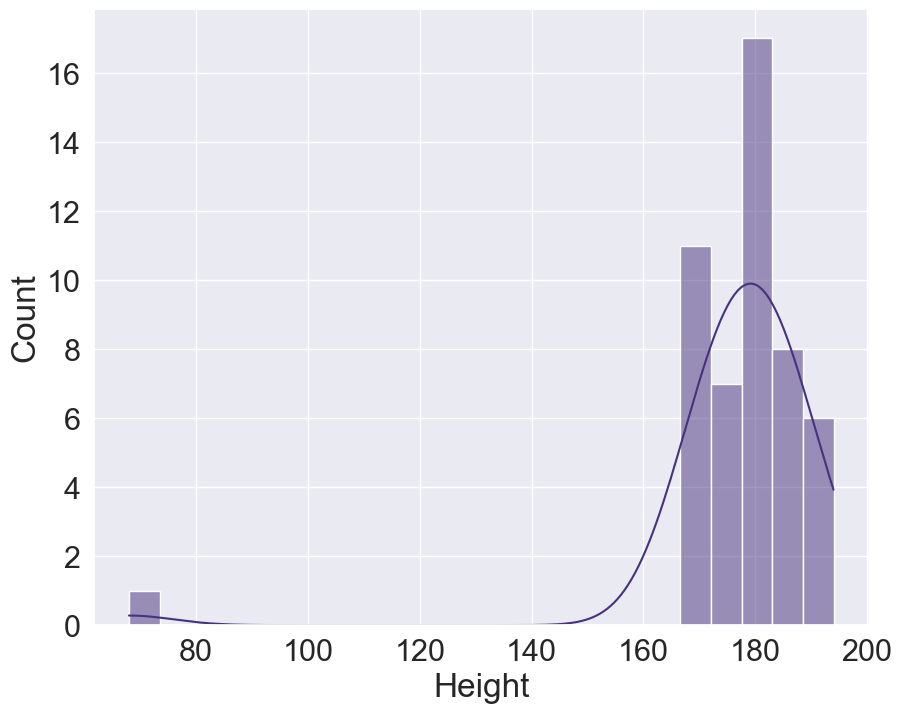

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(sample_1["Height"],kde=True)
plt.show()

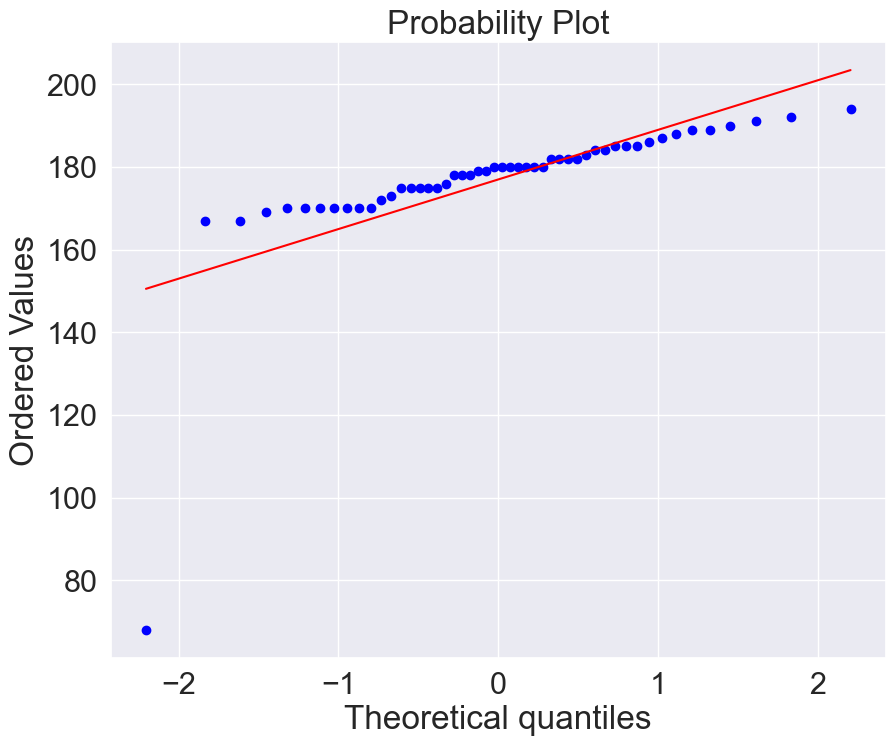

In [20]:
plt.figure(figsize=(10,8))
stats.probplot(sample_1["Height"],plot=plt,dist="norm")
plt.show()

## Checking normal distribution

In [22]:
stat, p_value= stats.shapiro(sample_1["Height"])
print(f"statistic={stat},p-value={p_value}")
alpha=0.05
if p_value>alpha:
    printr("The sample is normally distributed(fail to reject null hypothesis-the result is not significant)")
else:
    print("The sample is not normally distributed(reject null hypothesis-the result is significant)")

statistic=0.48936259746551514,p-value=6.052771131526136e-12
The sample is not normally distributed(reject null hypothesis-the result is significant)


In [23]:
stat, p_value= stats.shapiro(sample_2["Height"])
print(f"statistic={stat},p-value={p_value}")
alpha=0.05
if p_value>alpha:
    printr("The sample is normally distributed(fail to reject null hypothesis-the result is not significant)")
else:
    print("The sample is not normally distributed(reject null hypothesis-the result is significant)")

statistic=0.6713067293167114,p-value=2.0564547842383263e-09
The sample is not normally distributed(reject null hypothesis-the result is significant)


In [24]:
stats.ttest_ind(sample_1["Height"],sample_2["Height"])

TtestResult(statistic=4.1582633944682454, pvalue=6.829414329121301e-05, df=99.0)

In [41]:
stat, p_value= stats.ttest_ind(sample_1["Height"],sample_2["Height"])
print(f"statistic={stat},p-value={p_value}")
alpha=0.05
if p_value>alpha:
    printr(" accept null hypothesis and the means are equal between two group")
else:
    print("Reject null hypothesis and the means are not equal between two group)")

statistic=4.145931366324661,p-value=7.64312680769643e-05
Reject null hypothesis and the means are not equal between two group)


## Welch's test

In [42]:
stat, p_value= stats.ttest_ind(sample_1["Height"],sample_2["Height"],equal_var=False)
print(f"statistic={stat},p-value={p_value}")
alpha=0.05
if p_value>alpha:
    printr(" accept null hypothesis and the means are equal between two group")
else:
    print("Reject null hypothesis and the means are not equal between two group)")


statistic=4.145931366324661,p-value=7.64312680769643e-05
Reject null hypothesis and the means are not equal between two group)


In [38]:
import researchpy 
Descriptives, results= rp.ttest(sample_1["Height"],sample_2["Height"])

ModuleNotFoundError: No module named 'researchpy'